# Linear Regression

In [1]:
import pandas as pd    #import library 
import matplotlib.pyplot as plt  #import library 
import warnings as wr  #import library to remove a warning sign
wr.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\sultan chowdhury\\OneDrive\\Desktop\\Height-Weight.csv")# called a dataset by read_csv function

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail() # last 5 row of dataset

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape # size of dataset

(3501, 2)

In [6]:
row,col=df.shape

In [7]:
row

3501

In [8]:
col

2

In [9]:
df[20:35] # specific number of row and column

,Height,Weight
20,67.915050,174.115929
21,69.439440,197.731422
22,66.149132,149.173566
23,75.205974,228.761781
24,67.893196,162.006652
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639


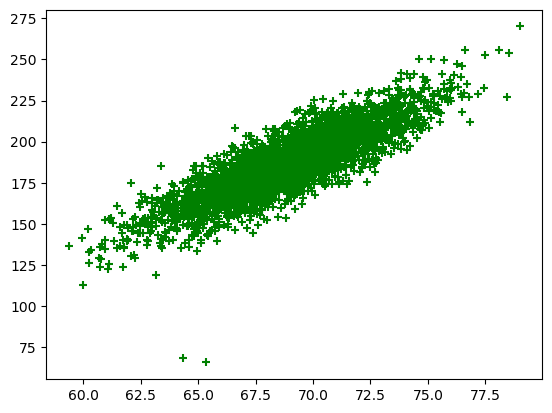

In [10]:
plt.scatter(df[['Height']],df[['Weight']],color='green',marker='+') #  draw a scatter to find a best fit line of data
plt.xlabel=('Height') 
plt.ylabel=('Weight')
plt.title=('Height And Weight Data')

In [11]:
df.Height.mean() # findout height column average

69.02441087268781

In [12]:
df.Weight.mean()  # findout weight column average

186.891257979463

In [13]:
x=df.drop(['Weight'],axis=1)# x feature value assign by drop weight column

In [14]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [15]:
y=df[['Weight']] # y value assign by target value column

In [16]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [17]:
from sklearn.model_selection import train_test_split as tts # import a model for data spliting

In [18]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.33,random_state=42)

In [19]:
xtrain.head()

,Height
1048,71.064105
3025,74.319890
3294,66.733634
2325,70.024051
1572,69.117657


In [20]:
ytrain.head()

,Weight
1048,200.684160
3025,210.041703
3294,171.524042
2325,197.255377
1572,197.491802


In [21]:
xtest.head() #to show first 5 rows of xtest

,Height
211,70.324753
1454,67.271615
2176,69.142273
912,77.160801
921,72.676961


In [22]:
ytest.head() # to show first 5 rows of ytest

,Weight
211,193.346560
1454,182.898115
2176,175.832447
912,228.707301
921,217.561415


# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg=LinearRegression() # creating a linear object

In [25]:
reg.fit(xtrain,ytrain) # for training model

LinearRegression()

In [26]:
reg.predict([[73.847017]])

array([[215.43210274]])

In [27]:
m=reg.coef_ #findout coefficent

In [28]:
m # m is coefficent

array([[5.93992915]])

In [29]:
c=reg.intercept_ #findout intercept

In [30]:
c # intercept

array([-223.21394581])

In [31]:
predict=m*73.847017+c

In [32]:
predict

array([[215.43210274]])

In [33]:
reg.predict([[73.847017]])

array([[215.43210274]])

In [34]:
reg.predict(xtest) # predicted a y by xtest

array([[194.51010677],
       [176.37468272],
       [187.48625638],
       ...,
       [184.37586024],
       [192.87632242],
       [163.21758048]])

In [35]:
df1=df.copy() # create a object to copy a original dataset

In [36]:
df1['Predicted']=reg.predict(df[['Height']]) # create an another column is called predicted

In [37]:
df1.head()

,Height,Weight,Predicted
0,73.847017,241.893563,215.432103
1,68.781904,162.310473,185.345691
2,74.110105,212.740856,216.994829
3,71.730978,220.042470,202.862983
4,69.881796,206.349801,191.878970


# Best Fit Line

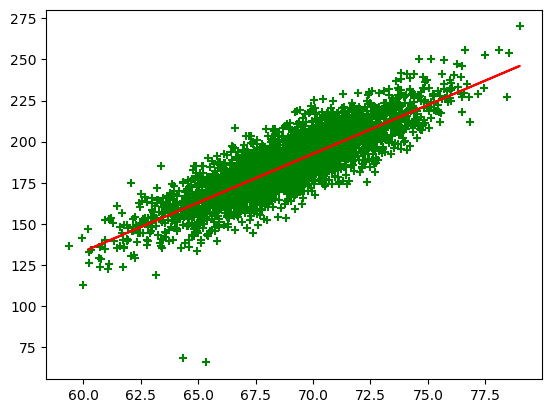

In [38]:
plt.scatter(df[['Height']],df[['Weight']],color='green',marker='+')
plt.plot(xtest,reg.predict(xtest),color='red')
plt.xlabel=('Height')
plt.ylabel=('Weight')
plt.title=('Height And Weight Data')

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
test_mse=mean_squared_error(ytest,reg.predict(xtest)) #xtest is actually predicted y

In [41]:
test_mse # mse value

102.04820659488412

In [42]:
test_mae=mean_absolute_error(ytest,reg.predict(xtest))  #xtest is actually predicted y

In [43]:
test_mae

8.153581219908506

In [44]:
test_mse=mean_squared_error(ytrain,reg.predict(xtrain))  #xtrain is actually predicted y

In [45]:
test_mse

107.95651281030432

In [46]:
test_mae=mean_absolute_error(ytrain,reg.predict(xtrain))  #xtrain is actually predicted y

# test_mae # MAE value

# Accuracy

In [47]:
reg.score(xtest,ytest)# testing accuracy

0.7405818543570803

In [48]:
reg.score(xtrain,ytrain)#training accuracy

0.728276613571109

# Save ml model

In [49]:
import joblib,pickle

In [50]:
pickle.dump(reg,open('pik1','wb'))# saving ml and wb means mode always has to save write binary mode(wb)

In [51]:
model2=pickle.load(open('pik1','rb'))

In [52]:
model2

LinearRegression()

In [53]:
model2.predict([[73.847017]])

array([[215.43210274]])

In [54]:
joblib.dump(reg,'job1')# saving by joblib

['job1']

In [57]:
model3=joblib.load('job1') # open the file

In [58]:
model3

LinearRegression()

In [59]:
model3.predict([[73.847017]]) 

array([[215.43210274]])